#Sensor-based Human Activity Recognition with Machine Learning Classification

#1. Importing  Dataset

In [63]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [64]:
data=pd.read_csv("Trimmed_WearableComputing_weight_lifting_exercises_biceps_curl_variations .csv")

In [65]:
data.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28-11-2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,eurico,1322489729,62641,28-11-2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,eurico,1322489729,70653,28-11-2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,eurico,1322489729,82654,28-11-2011 14:15,no,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,eurico,1322489729,90637,28-11-2011 14:15,no,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E


In [66]:
data.shape

(4024, 59)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_name             4024 non-null   object 
 1   raw_timestamp_part_1  4024 non-null   int64  
 2   raw_timestamp_part_2  4024 non-null   int64  
 3   cvtd_timestamp        4024 non-null   object 
 4   new_window            4024 non-null   object 
 5   num_window            4024 non-null   int64  
 6   roll_belt             4024 non-null   float64
 7   pitch_belt            4024 non-null   float64
 8   yaw_belt              4024 non-null   float64
 9   total_accel_belt      4024 non-null   int64  
 10  gyros_belt_x          4024 non-null   float64
 11  gyros_belt_y          4024 non-null   float64
 12  gyros_belt_z          4024 non-null   float64
 13  accel_belt_x          4024 non-null   int64  
 14  accel_belt_y          4024 non-null   int64  
 15  accel_belt_z         

In [86]:
data.shape

(4024, 59)

In [87]:
data.columns

Index(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z',
       'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm',
       'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
       'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',
       'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z',
       'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'ac

In [88]:
data.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,2,1322489729,34670,1,0,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,4
1,2,1322489729,62641,1,0,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,4
2,2,1322489729,70653,1,0,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,4
3,2,1322489729,82654,1,0,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,4
4,2,1322489729,90637,1,0,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,4


In [89]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate over object columns and encode them
for column in data.select_dtypes(include=['object']):
    data[column] = encoder.fit_transform(data[column])

# Verify the converted columns
print(data.dtypes)


user_name                 int64
raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
cvtd_timestamp            int64
new_window                int64
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_a

In [90]:
data.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,2,1322489729,34670,1,0,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,4
1,2,1322489729,62641,1,0,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,4
2,2,1322489729,70653,1,0,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,4
3,2,1322489729,82654,1,0,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,4
4,2,1322489729,90637,1,0,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,4


In [91]:
        
    data.shape

(4024, 59)

#4. Exploratory Data Analysis

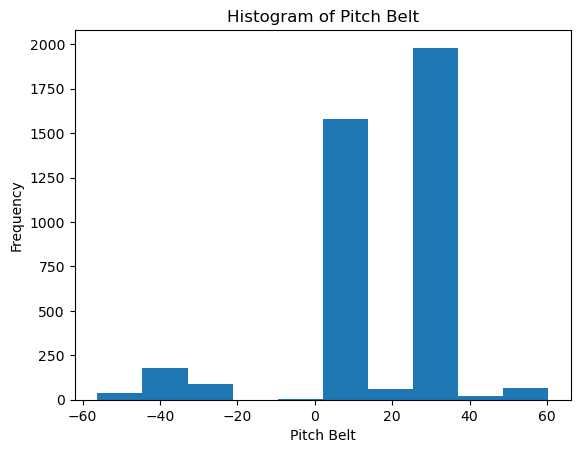

In [92]:
import matplotlib.pyplot as plt

plt.hist(data['pitch_belt'], bins=10)
plt.xlabel('Pitch Belt')
plt.ylabel('Frequency')
plt.title('Histogram of Pitch Belt')
plt.show()


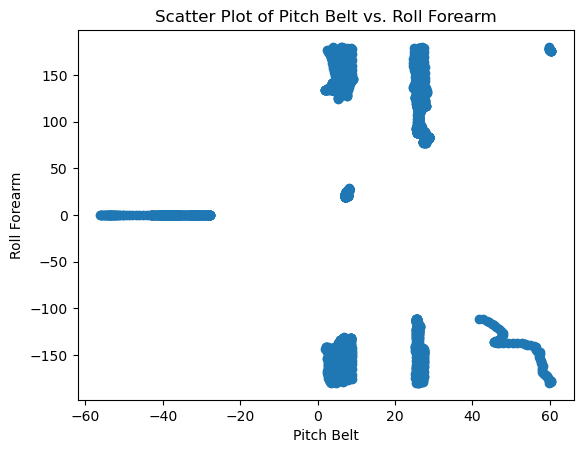

In [93]:
plt.scatter(data['pitch_belt'], data['roll_forearm'])
plt.xlabel('Pitch Belt')
plt.ylabel('Roll Forearm')
plt.title('Scatter Plot of Pitch Belt vs. Roll Forearm')
plt.show()


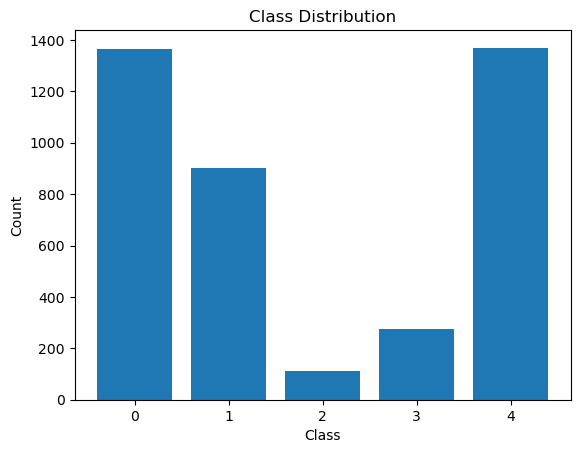

In [94]:
class_counts = data['classe'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


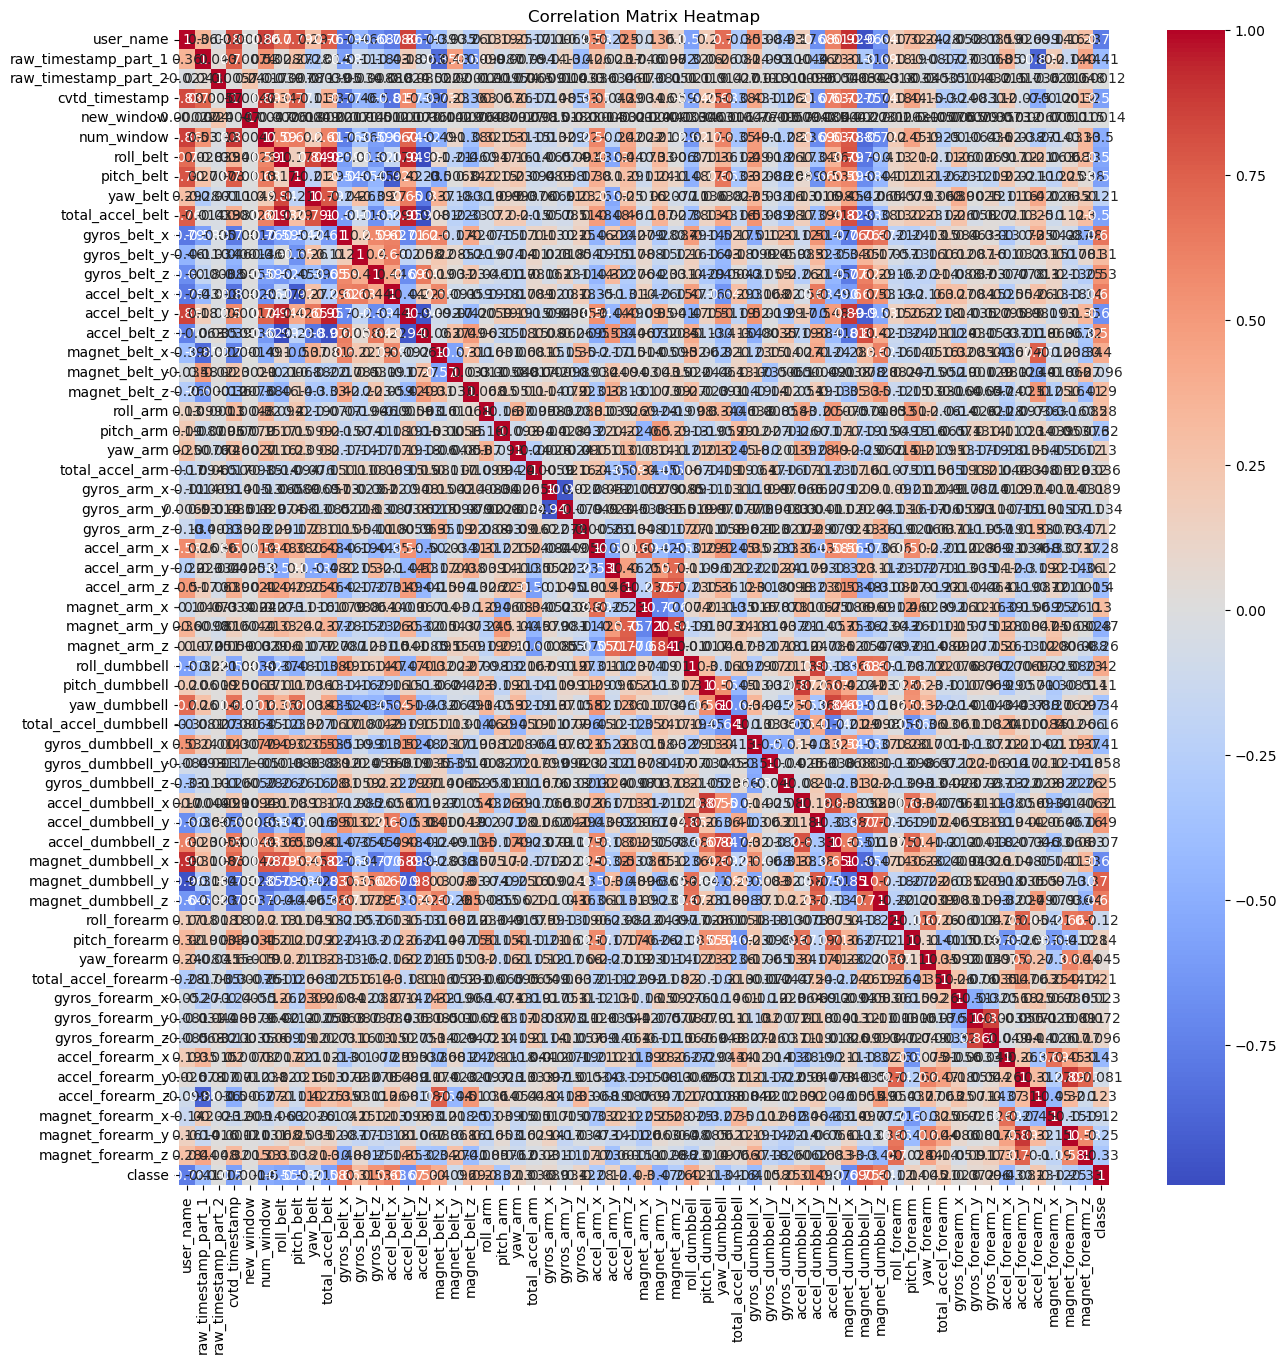

In [95]:
correlation_matrix = data.corr()
plt.figure(figsize= (15,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [96]:
X = data.iloc[:,:-1]
y = data['classe']
X.shape

(4024, 58)

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
from sklearn.naive_bayes import GaussianNB


# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Separate the features and target variable
X = data.iloc[:,:-1]
y = data['classe']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Naive Bayes Technique
g1 = GaussianNB()
g1.fit(X_train,y_train)
predict = g1.predict(X_test)
gn = g1.score(X_test,y_test)

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_param_grid = {'C': [0.1, 1, 10]}
lr_grid_search = GridSearchCV(lr_classifier, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_

# Knn
# k-NN
knn_classifier = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)

knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_



# Evaluation

# Logistic Regression
lr_predictions = lr_best_model.predict(X_test)
lr_classification_report = classification_report(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
lr_auc_score = roc_auc_score(y_test, lr_best_model.predict_proba(X_test), multi_class='ovr')

# k-NN
knn_predictions = knn_best_model.predict(X_test)
knn_classification_report = classification_report(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_auc_score = roc_auc_score(y_test, knn_best_model.predict_proba(X_test), multi_class='ovr')


# Print the results


# Naive bayes technique
print("Naive bayes")
c_n_b = confusion_matrix(y_test,predict)

classification_r = classification_report(y_test,predict)
print("Classification report")
print(classification_r)
print("confusion matrix")
print(c_n_b)


# Logistic Regression
print("Logistic Regression:")
print("Classification Report:")
print(lr_classification_report)
print("Confusion Matrix:")
print(lr_confusion_matrix)
#print("AUC Score:", lr_auc_score)
print()

# k-NN
print("k-NN Classifier:")
print("Classification Report:")
print(knn_classification_report)
print("Confusion Matrix:")
print(knn_confusion_matrix)
#print("AUC Score:", knn_auc_score)
print()




Naive bayes
Classification report
              precision    recall  f1-score   support

           0       0.99      0.31      0.47       258
           1       0.43      0.78      0.56       176
           2       0.31      0.77      0.44        22
           3       0.62      1.00      0.77        54
           4       1.00      0.88      0.94       295

    accuracy                           0.68       805
   macro avg       0.67      0.75      0.63       805
weighted avg       0.83      0.68      0.68       805

confusion matrix
[[ 80 178   0   0   0]
 [  0 138  38   0   0]
 [  0   5  17   0   0]
 [  0   0   0  54   0]
 [  1   0   0  33 261]]
Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.32      1.00      0.49       258
           1       0.00      0.00      0.00       176
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        54
           4       0.00      